In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r'C:\Users\admin\Desktop\Data Analysis\Youtube_Project\video_id_info.csv', on_bad_lines='skip')

C:\Users\admin\AppData\Local\Temp\ipykernel_12512\3420998567.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\admin\Desktop\Data Analysis\Youtube_Project\video_id_info.csv', on_bad_lines='skip')


In [5]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [6]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 2. Performing Sentiment Analysis

In [9]:
import sys 
!{sys.executable} -m pip install textblob

In [10]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [11]:
from textblob import TextBlob

In [12]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [13]:
df.shape

(691374, 4)

In [14]:
sample_df = df[0:1000]

In [15]:
polarity = [] 
for comment in df['comment_text']:
    try:
      polarity.append(TextBlob(comment).sentiment.polarity)
    except: 
      polarity.append(0)

In [16]:
len(polarity)

691374

In [17]:
df['polarity'] = polarity

In [18]:
df.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## 3. Wordcloud Analysis of your data


In [19]:
filter1 = df['polarity']==1
comments_positive = df[filter1]


In [20]:
filter2 = df['polarity']==-1
comments_negative = df[filter2]

In [21]:
import sys
!{sys.executable} -m pip install wordcloud

In [22]:
from wordcloud import WordCloud, STOPWORDS

In [23]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [24]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [25]:
type(df['comment_text'])

pandas.core.series.Series

In [26]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [27]:
wordcloud = WordCloud(stopwords= set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

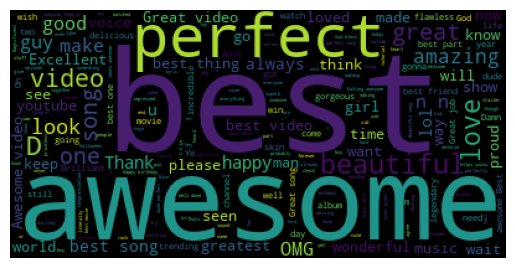

In [28]:
plt.imshow(wordcloud)
plt.axis('off')

## 4. Perform Emoji Analysis

In [29]:
import sys
!{sys.executable} -m pip  install emoji==2.10.1

In [30]:
import emoji

In [31]:
emoji.__version__

'2.10.1'

In [33]:
df['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [34]:
comment = 'trending'

In [35]:
[char for char in comment if char in emoji.EMOJI_DATA]

[]

In [36]:
emoji_list = []
for char in comment:
    if char in emoji.EMOJI_DATA:
       emoji_list.append(char)
emoji_list

[]

In [37]:
all_emojis_list= []
for comment in df['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [38]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [39]:
from collections import Counter 

In [40]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [41]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [42]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [43]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [44]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [45]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [46]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [47]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [48]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [50]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
freqs
         

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [52]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [53]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [54]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [55]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [56]:
trace = go.Bar(x =emojis, y=freqs)

In [57]:
iplot([trace])

##  5. Collect Enitre Data of Youtube

In [60]:
import os

In [61]:
files = os.listdir(r'C:\Users\admin\Desktop\Data Analysis\Python_youtube_Analysis-master\YT_additional_data')

In [62]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'README.md',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [63]:
files_csv = [file for file in files if '.csv'in file]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [65]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [67]:
full_df = pd.DataFrame()
path = r'C:\Users\admin\Desktop\Data Analysis\Python_youtube_Analysis-master\YT_additional_data'
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding = 'iso-8859-1')
    full_df = pd.concat([full_df, current_df], ignore_index= True)

In [69]:
full_df.shape

(375942, 16)

In [72]:
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [76]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [77]:
full_df = full_df.drop_duplicates()

In [79]:
full_df.shape

(339525, 16)

In [81]:
full_df[0:1000].to_csv(r'C:\Users\admin\Desktop\Data Analysis\Python_youtube_Analysis-master\youtube_sample_Data.csv', index=False)

In [83]:
full_df[0:1000].to_json(r'C:\Users\admin\Desktop\Data Analysis\Python_youtube_Analysis-master\youtube_sample_Data.json', index=False)

In [84]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [85]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [89]:
json_df = pd.read_json(r'C:\Users\admin\Desktop\Data Analysis\Python_youtube_Analysis-master\YT_additional_data\US_category_id.json')

In [90]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [91]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [92]:
cat_dict = {}
for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [93]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [94]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [95]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)
full_df['category_name']

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
                ...       
375936      People & Blogs
375938      People & Blogs
375939       Entertainment
375940    Film & Animation
375941              Gaming
Name: category_name, Length: 339525, dtype: object

In [96]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

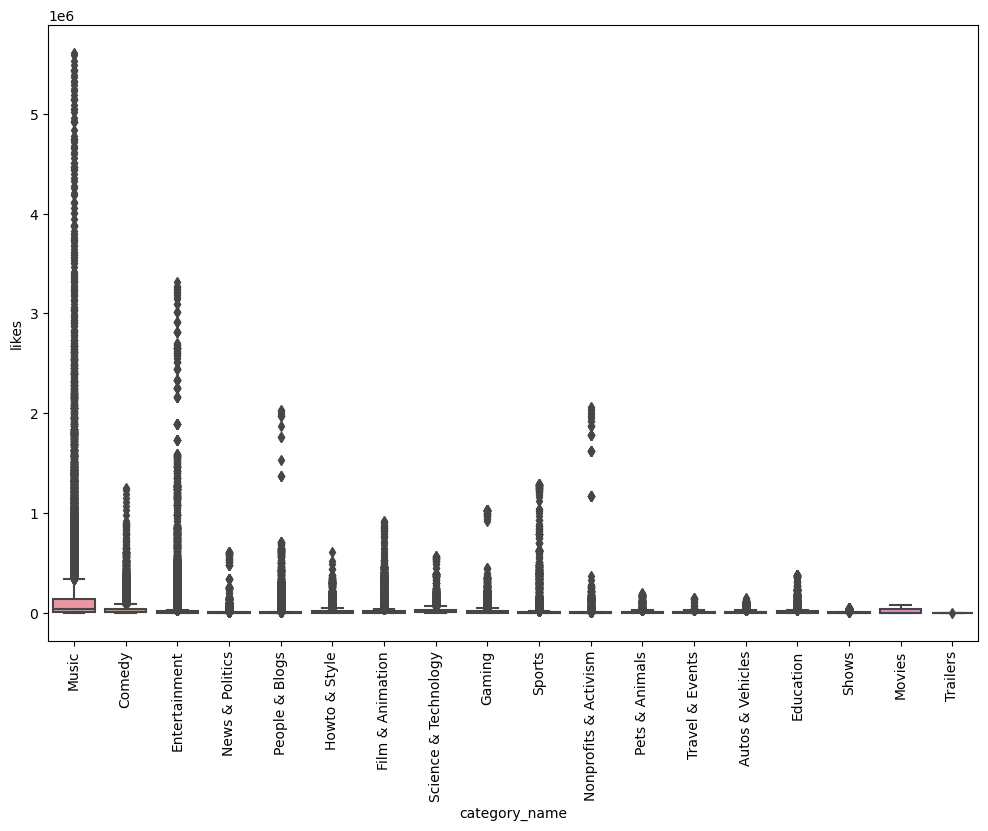

In [99]:
plt.figure(figsize = (12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')

## 8. Find out whether audience is engaged or not

In [100]:
(full_df['likes']/full_df['views'])*100


0          4.589104
1         12.594873
2          4.575843
3          6.309630
4          4.874563
            ...    
375936     7.820293
375938     5.635623
375939     4.507286
375940     3.408645
375941     3.464728
Length: 339525, dtype: float64

In [101]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [102]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

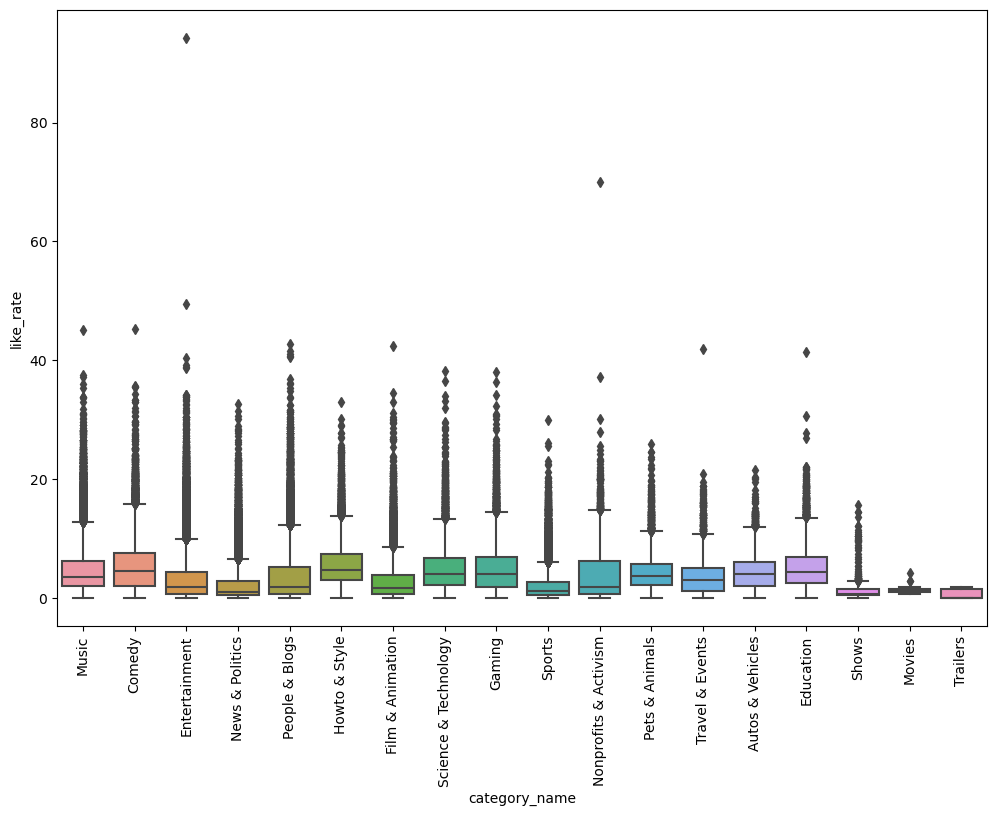

In [104]:
plt.figure(figsize = (12,8))
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.show()

## 9. which channels have the highest number of trending videos?

In [105]:
full_df['channel_title'].value_counts()


channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

In [106]:
full_df.groupby(['channel_title']).size()

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    3
                                          ..
ï¼åã§ã§ãã DIY                     5
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Length: 37824, dtype: int64

In [114]:
cdf=full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [119]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [120]:
cdf = cdf.rename(columns={0:'total_videos'})

In [121]:
import plotly.express as px

In [122]:
px.bar(data_frame=cdf[0:20] , x='channel_title', y='total_videos')